In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the iris dataset
data='http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris_data = pd.read_csv(data, names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"])

# Define a function to preprocess the data
def preprocess_data(df):
    numeric_values = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}
    X = df.drop(['Species'], axis=1)
    X = np.hstack((X.values, np.ones((X.shape[0], 1)))) # Add a bias column to X
    y = df['Species'].replace(numeric_values).values.reshape(-1, 1)
    return X, y
iris_data.head()





,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Preprocess the data
X, y = preprocess_data(iris_data)

# Define hyperparameters
num_iterations = 10000
learning_rate = 0.003

# Define a function to compute the beta values
def compute_beta(X, y, num_iterations, learning_rate):
    np.random.seed(0)
    beta = np.random.randn(1, X.shape[1])
    cost_history = np.zeros(num_iterations)
    print ('Beta :',beta)
    for i in range(num_iterations):
        temp1 = (np.dot(X, beta.T) - y)
        temp2 = np.sum(temp1 ** 2)
        cost_history[i] = (1 / (2 * X.shape[0]) * temp2)
        beta = beta - ((learning_rate / X.shape[0]) * np.dot(temp1.T, X))
    plt.plot(np.arange(num_iterations), cost_history)
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.title("RMS Error vs Alpha(0.003)")
    plt.show()
    return beta

Beta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


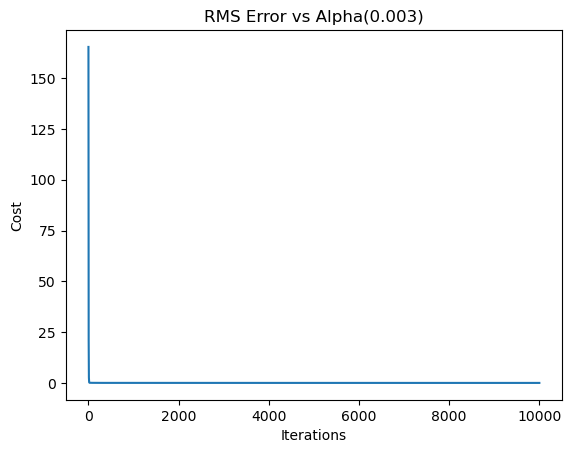

Accuracy of the model: 95.33333333333334


In [10]:
# Compute the beta values
beta = compute_beta(X, y, num_iterations, learning_rate)

# Make predictions and compute the accuracy
predictions = np.round(np.dot(X, beta.T))
accuracy = (sum(predictions == y) / float(len(y)) * 100)[0]
print("Accuracy of the model:", accuracy)

# Define a function for k-fold cross-validation
def k_fold_cross_validation(X, y, k=10):
    indices = np.random.permutation(len(X))
    X = X[indices]
    y = y[indices]
    fold_size = len(X) // k
    accuracies = []
    for i in range(k):
        start, end = i * fold_size, (i + 1) * fold_size
        X_test = X[start:end]
        y_test = y[start:end]
        X_train = np.concatenate((X[:start], X[end:]))
        y_train = np.concatenate((y[:start], y[end:]))
        beta = compute_beta(X_train, y_train, num_iterations, learning_rate)
        predictions = np.round(np.dot(X_test, beta.T))
        accuracy = (sum(predictions == y_test) / float(len(y_test)) * 100)[0]
        accuracies.append(accuracy)
    return accuracies

Beta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


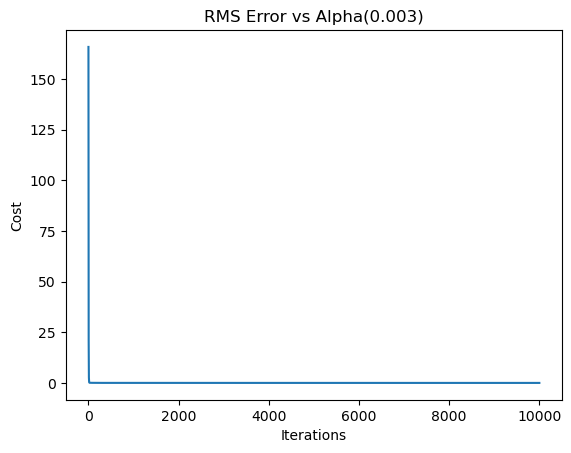

Beta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


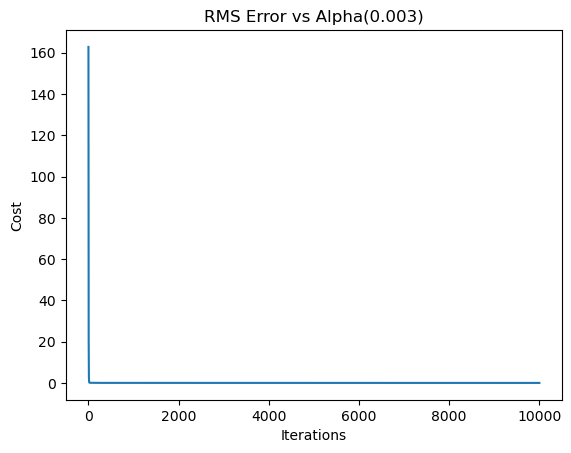

Beta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


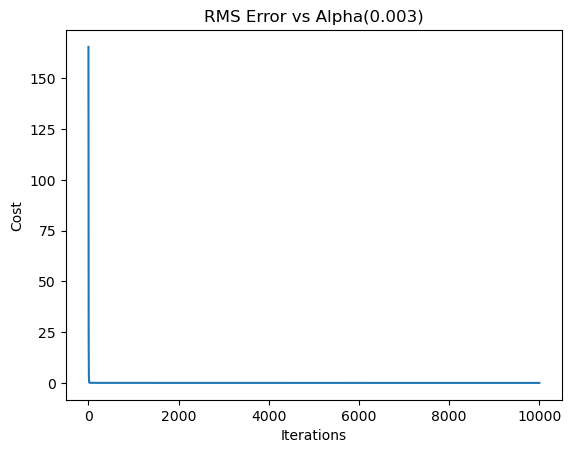

Beta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


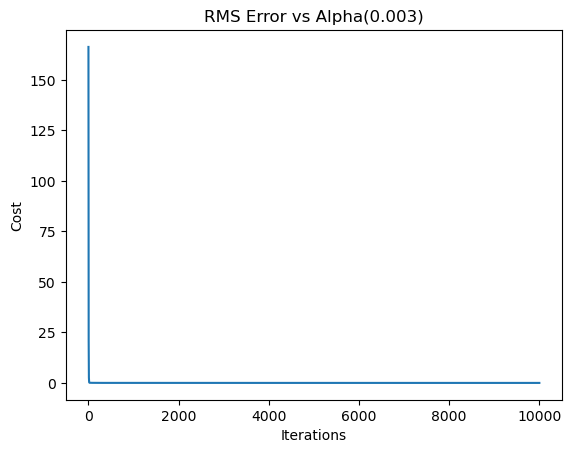

Beta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


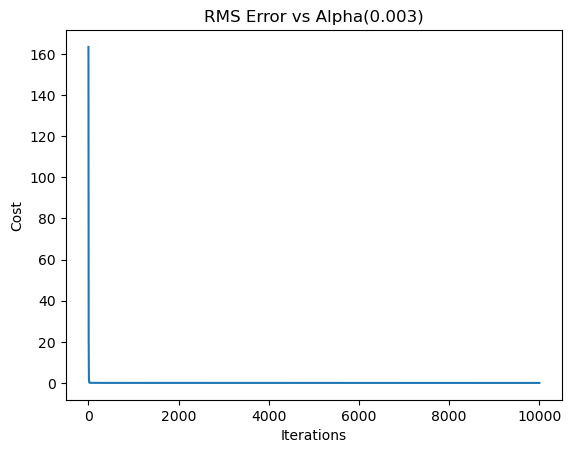

Beta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


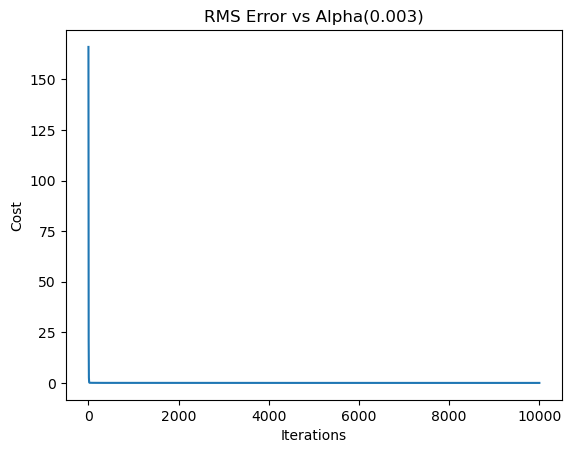

Beta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


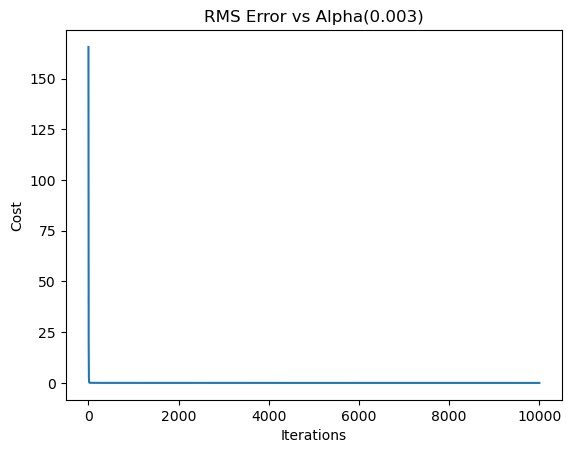

Beta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


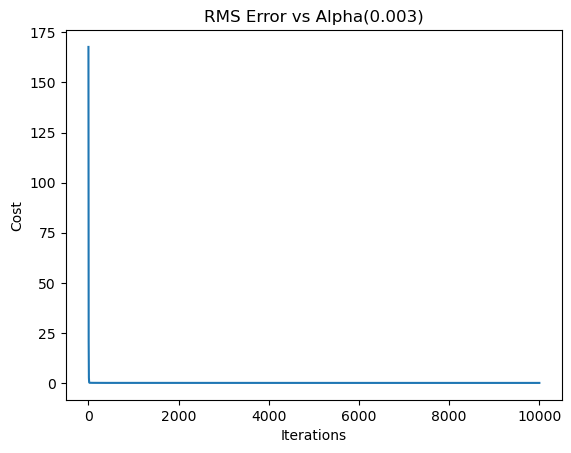

Beta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


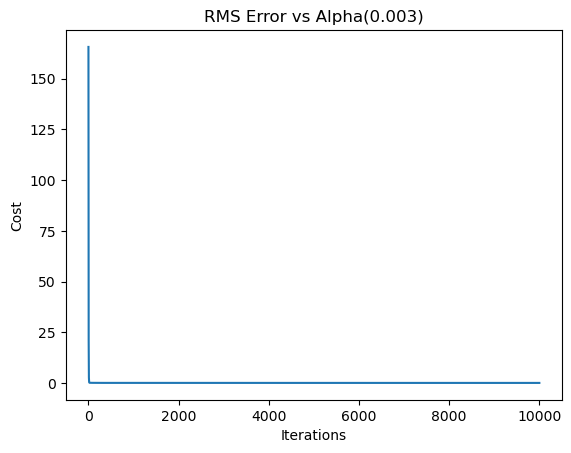

Beta : [[1.76405235 0.40015721 0.97873798 2.2408932  1.86755799]]


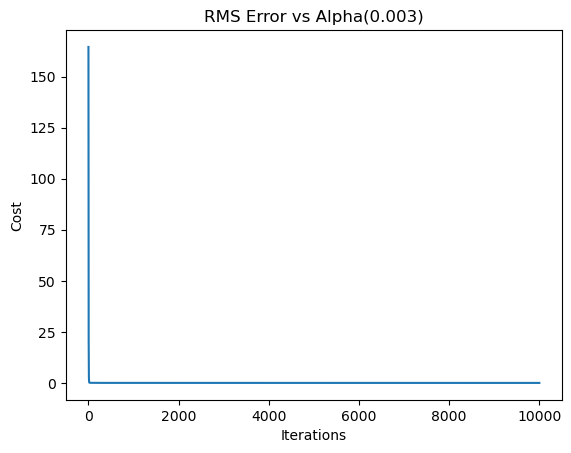

Cross-validation accuracy: 94.66666666666666


In [11]:

# Compute the cross-validation accuracy
cv_accuracy = np.mean(k_fold_cross_validation(X, y, k=10))
print("Cross-validation accuracy:", cv_accuracy)